In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv
/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv')

## 1.Try to understand what the data looks like
#### ** Check the head, shape, data-types of the features.
#### ** Check if there are some dublicate rows or not. If there are, then drop them.
#### ** Check the statistical values of features.
#### ** If needed, rename the columns' names for easy use.
#### ** Basically check the missing values.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [7]:
# renaming column name if necessary

df.columns = df.columns.str.replace('-','_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,31759.0,10.082843,2.576172,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [12]:
df.describe(include = object)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [13]:
obj_col = df.loc[:, df.dtypes == object].columns
obj_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [14]:
df.education.value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [15]:
for col in obj_col:
    print(col)
    print(df[col].value_counts())
    print('------------------------------------------')

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
------------------------------------------
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
------------------------------------------
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_st

In [16]:
df.salary.value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

In [109]:
print((df.astype(str)=='?').sum())

## any() - gives bool value
## sum() - gives no.of values present

age                  0
workclass            0
fnlwgt               0
education            0
marital_status       0
occupation           0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
education_summary    0
Marital_Status       0
dtype: int64


## Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

### to do list for numeric features:

##### ** Check the boxplot to see extreme values
##### ** Check the histplot/kdeplot to see distribution of feature
##### ** Check the statistical values
##### ** Check the boxplot and histplot/kdeplot by "salary" levels
##### ** Check the statistical values by "salary" levels
##### ** Write down the conclusions you draw from your analysis

### to do list for categoric features:

##### ** Find the features which contains similar values, examine the similarities and analyze them together
##### ** Check the count/percentage of person in each categories and visualize it with a suitable plot
##### ** If need, decrease the number of categories by combining similar categories
##### ** Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
##### ** Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
##### ** Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
##### ** Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
##### ** Write down the conclusions you draw from your analysis

## Salary

In [18]:
df.salary.value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

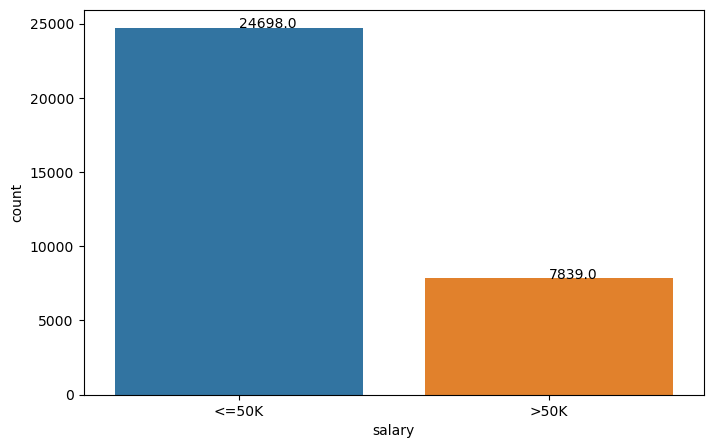

In [19]:
plt.figure(figsize=(8,5))
sal_plot = sns.countplot(x='salary',data=df)
for sal in sal_plot.patches:
    sal_plot.annotate((sal.get_height()),(sal.get_x()+0.4, sal.get_height()+1),fontsize=10);

In [20]:
per_sal = df['salary'].value_counts()/len(df) 
per_sal

<=50K    0.759074
>50K     0.240926
Name: salary, dtype: float64

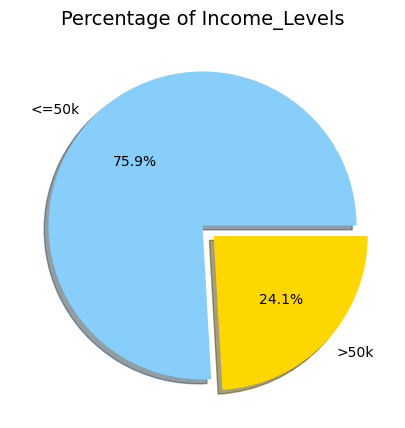

In [21]:
plt.figure(figsize=(10,5))

plt.pie(per_sal,
       labels=['<=50k','>50k'],
       explode = [0,0.1],
       shadow = True,
       autopct = '%0.1f%%',
       colors = ['lightskyblue','gold'])
plt.title('Percentage of Income_Levels',fontsize=14);

#### Result : 75.9% of the people's salary is lesser than 50K and rest of 24.1% of the people's salary is greater than 50K

### comparing all the other numerical features with the salary and finding the final conclusion / result

## Numeric Data

#### For a numeric or continous data column we need to use either the hist,kde,box plots 

## Age

<Axes: xlabel='age', ylabel='Count'>

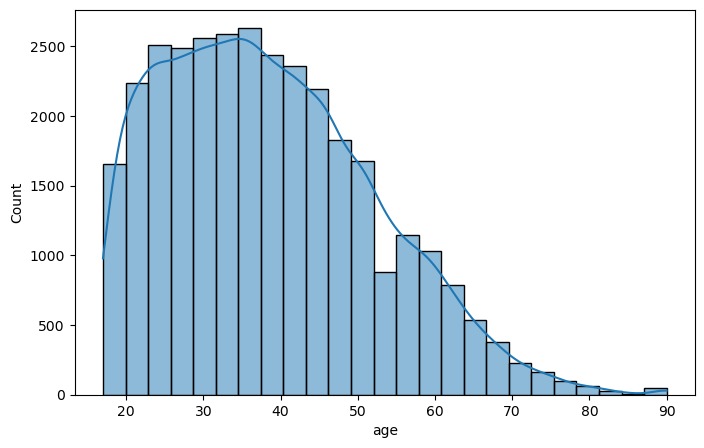

In [22]:
# kde can also be included in the histplot

plt.figure(figsize=(8,5))
sns.histplot(x='age', data = df, kde = True , bins = 25)

<Axes: xlabel='age'>

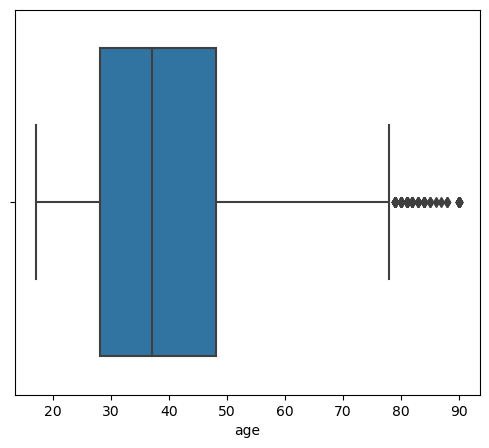

In [23]:
# boxplot also indicates the 3 quartiles (i.e q1 ,q2 ,q3)

plt.figure(figsize=(6,5))
sns.boxplot(x='age',data = df)

<Axes: xlabel='age', ylabel='Count'>

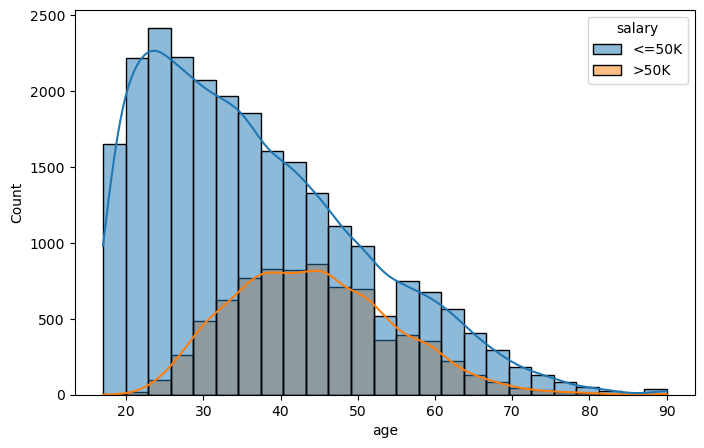

In [24]:
# comparing both the age and the salary data

plt.figure(figsize=(8,5))
sns.histplot(x='age',hue='salary',kde=True,data=df,bins=25)

<Axes: xlabel='salary', ylabel='age'>

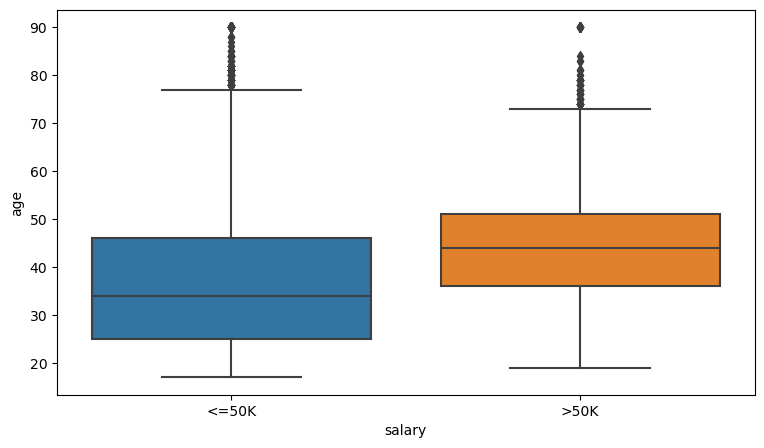

In [25]:
plt.figure(figsize=(9,5))
sns.boxplot(x='salary',y='age',data=df)

In [26]:
df.groupby('salary')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


#### Result : The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.

## fnlwgt

#### check the box plot to see the extreme values

<Axes: xlabel='fnlwgt', ylabel='Density'>

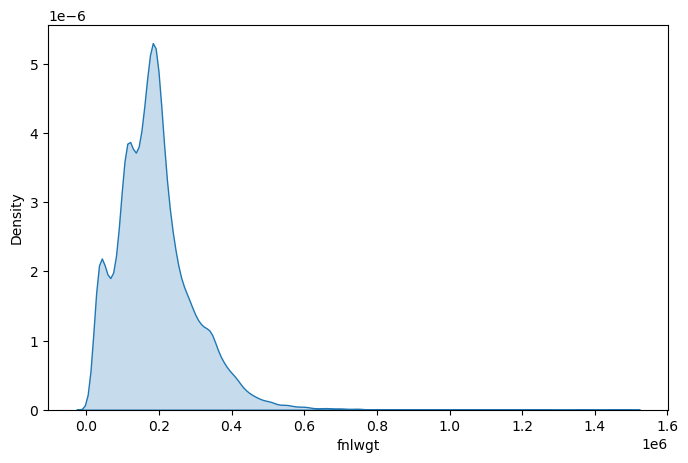

In [27]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='fnlwgt',data=df,fill=True)

<Axes: xlabel='fnlwgt'>

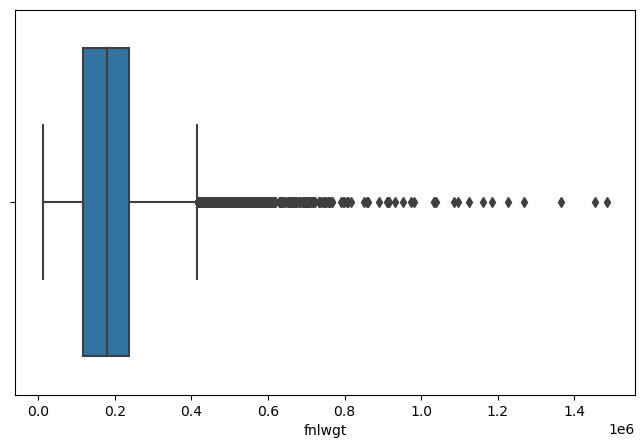

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fnlwgt',data=df)

<Axes: xlabel='salary', ylabel='fnlwgt'>

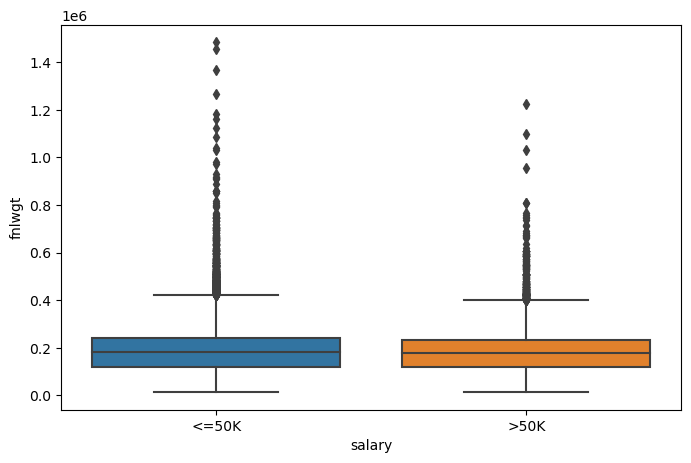

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='fnlwgt',data=df)

<Axes: xlabel='fnlwgt', ylabel='Count'>

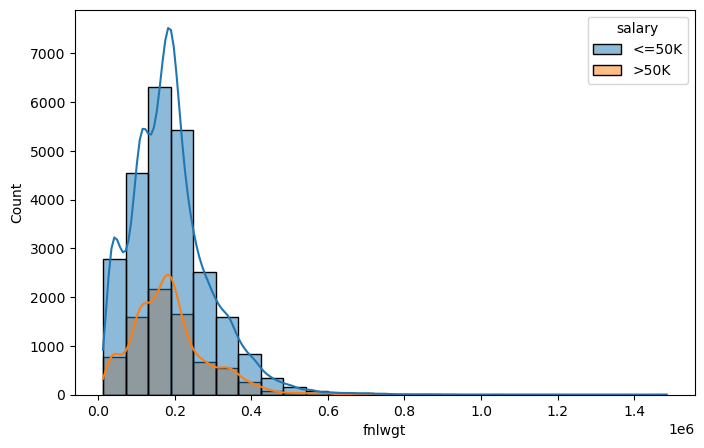

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(x='fnlwgt',hue='salary',data=df,kde=True,bins=25)

In [31]:
df.groupby('salary')['fnlwgt'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,190345.926796,106487.413197,12285.0,117606.0,179465.0,238968.25,1484705.0
>50K,7839.0,188000.480674,102554.464101,14878.0,119100.0,176063.0,230969.00,1226583.0


#### Result : There is no significant difference between high and low-income groups according to the "fnlwgt" feature.

## Capital_gain

<Axes: xlabel='capital_gain', ylabel='Density'>

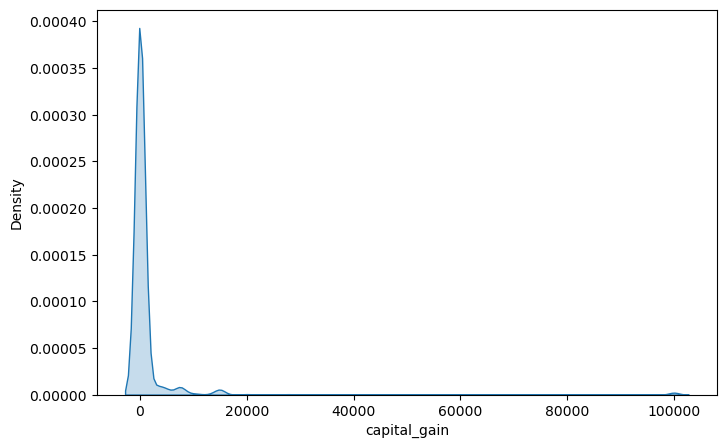

In [32]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='capital_gain',data=df,fill=True)

<Axes: xlabel='capital_gain'>

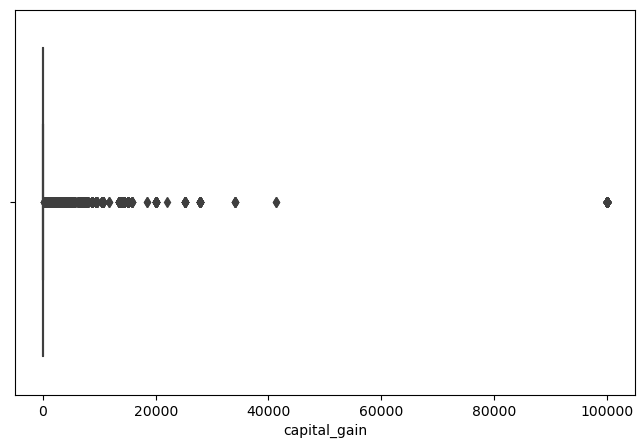

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='capital_gain',data=df)

<Axes: xlabel='salary', ylabel='capital_gain'>

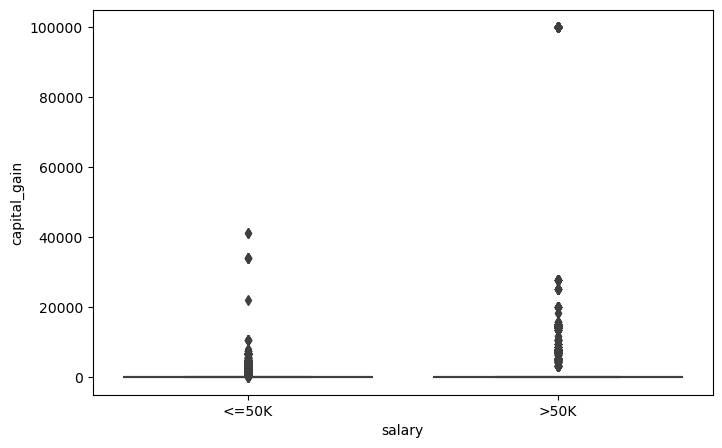

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='capital_gain',data=df)

<Axes: xlabel='capital_gain', ylabel='Count'>

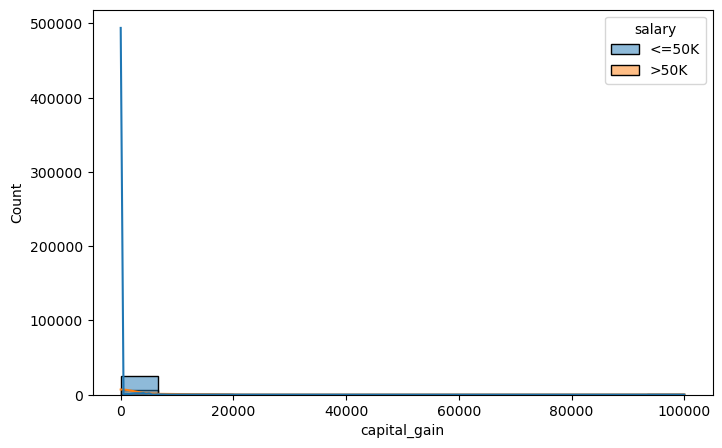

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(x='capital_gain',hue='salary',data=df,kde=True,bins=15)

In [36]:
df.groupby('salary')['capital_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,148.884970,963.557955,0.0,0.0,0.0,0.0,41310.0
>50K,7839.0,4007.164562,14572.097223,0.0,0.0,0.0,0.0,99999.0


#### Check the statistical values by "salary" levels for capital_gain not equal the zero

In [37]:
df.loc[df['capital_gain'] != 0].groupby('salary')['capital_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,1035.0,3552.81256,3173.419287,114.0,2202.0,3273.0,4101.0,41310.0
>50K,1677.0,18731.16458,26778.676066,3103.0,7298.0,7896.0,15024.0,99999.0


#### Result : The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high-income".

## Capital_loss

<Axes: xlabel='capital_loss', ylabel='Density'>

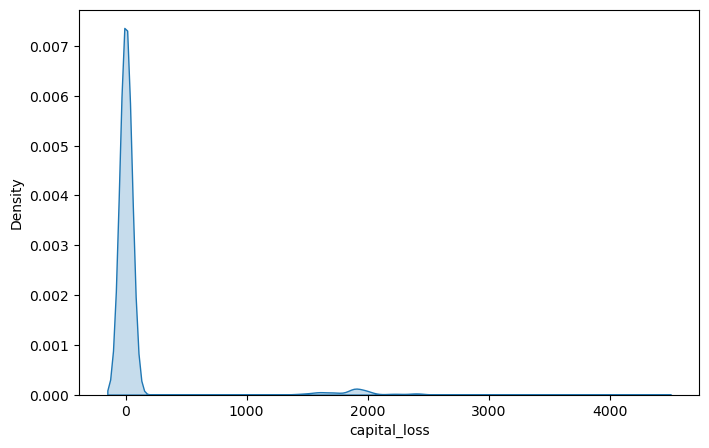

In [38]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='capital_loss',data=df,fill=True)

<Axes: xlabel='capital_loss'>

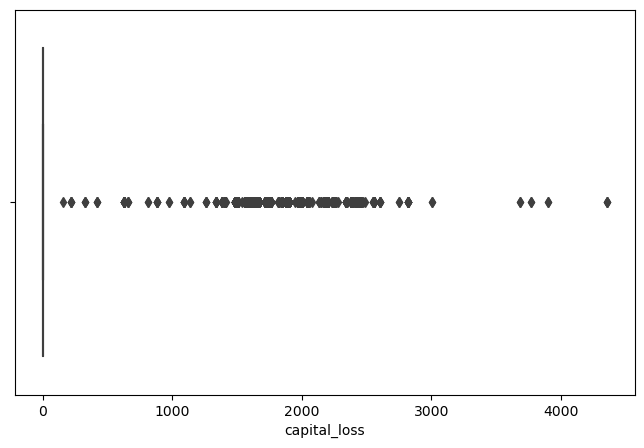

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='capital_loss',data=df)

<Axes: xlabel='capital_loss', ylabel='Count'>

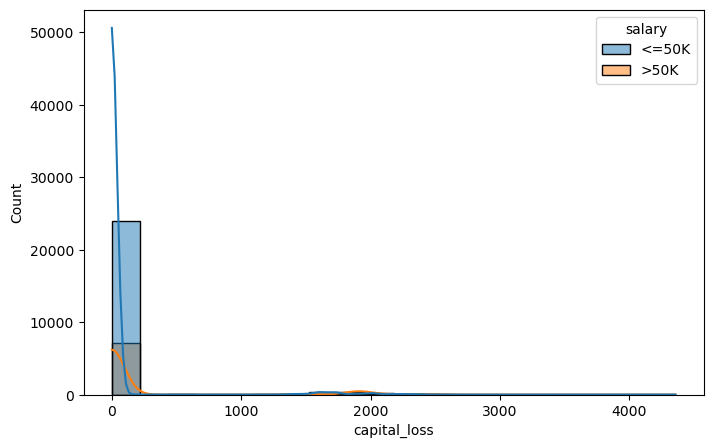

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(x='capital_loss',hue='salary',data=df,kde=True,bins=20)

<Axes: xlabel='salary', ylabel='capital_loss'>

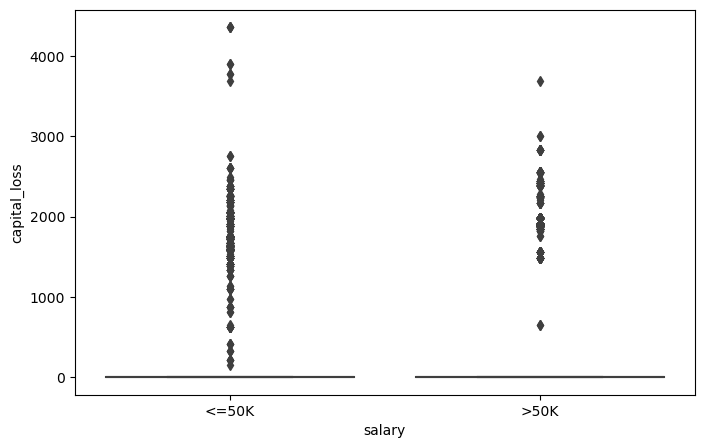

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='capital_loss',data=df)

In [42]:
df.groupby('salary')['capital_loss'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,53.190258,310.890099,0.0,0.0,0.0,0.0,4356.0
>50K,7839.0,195.051282,595.555395,0.0,0.0,0.0,0.0,3683.0


In [43]:
df.loc[df['capital_loss']!=0].groupby('salary')['capital_loss'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,746.0,1760.982574,438.906164,155.0,1590.0,1721.0,1980.0,4356.0
>50K,773.0,1978.016818,264.143642,653.0,1887.0,1902.0,1977.0,3683.0


#### Result : there is no significant difference between high and low_income groups according to the capital_loss

## Hours_per_week


<Axes: xlabel='hours_per_week', ylabel='Density'>

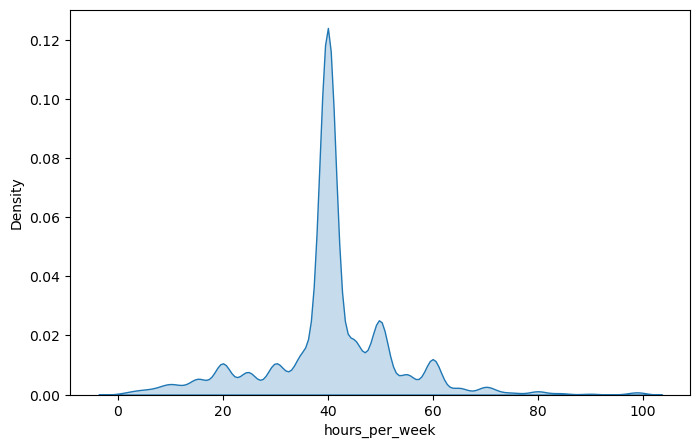

In [44]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='hours_per_week',data=df,fill=True)

<Axes: xlabel='hours_per_week'>

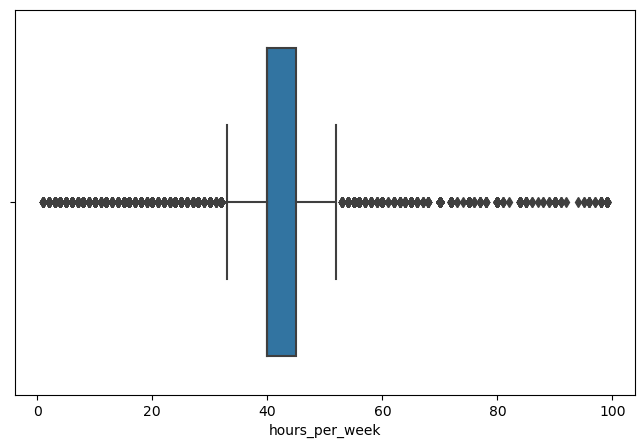

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hours_per_week',data=df)

<Axes: xlabel='hours_per_week', ylabel='Count'>

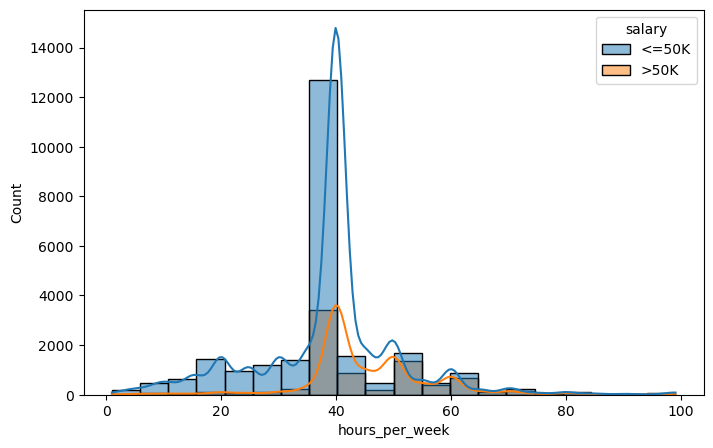

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(x='hours_per_week',hue='salary',data=df,kde=True,bins=20)

<Axes: xlabel='salary', ylabel='hours_per_week'>

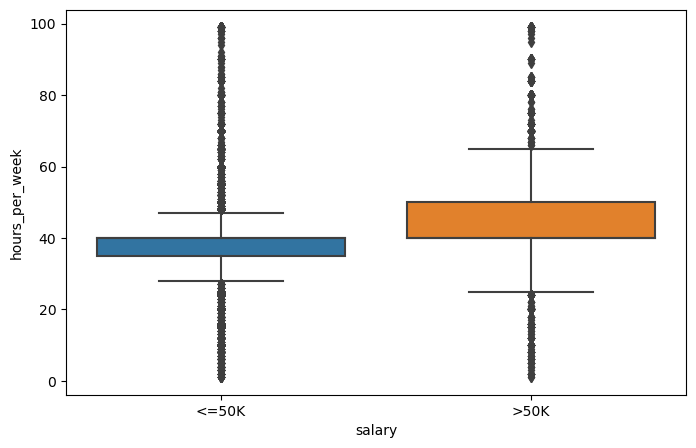

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='hours_per_week',data=df)

In [48]:
df.groupby('salary')['hours_per_week'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,38.842862,12.318286,1.0,35.0,40.0,40.0,99.0
>50K,7839.0,45.473402,11.014165,1.0,40.0,40.0,50.0,99.0


#### Result : To be in a high-income group, almost at least 40 hours working per week is required. Most of those who work less than 40 hours per week are in the low-income group.

## education_num

<Axes: xlabel='education_num', ylabel='Density'>

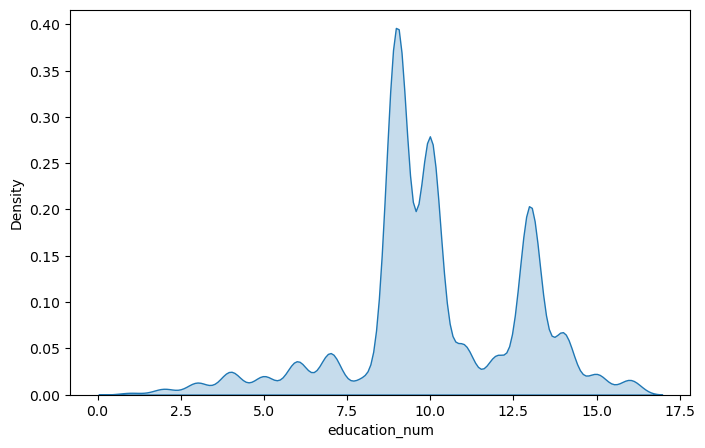

In [49]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='education_num',data=df,fill=True)

<Axes: xlabel='education_num'>

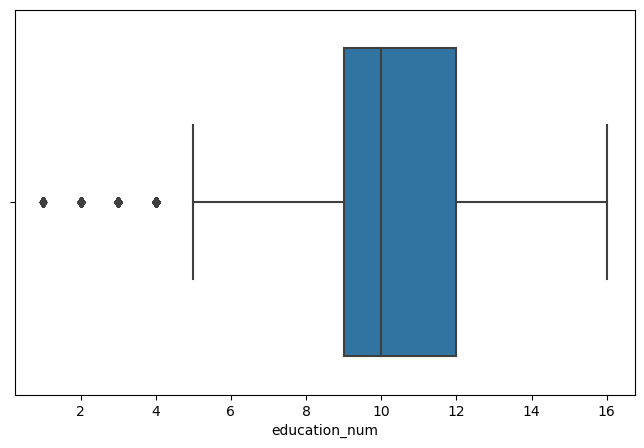

In [50]:
plt.subplots(figsize=(8,5))
sns.boxplot(x='education_num',data=df)

<Axes: xlabel='education_num', ylabel='Density'>

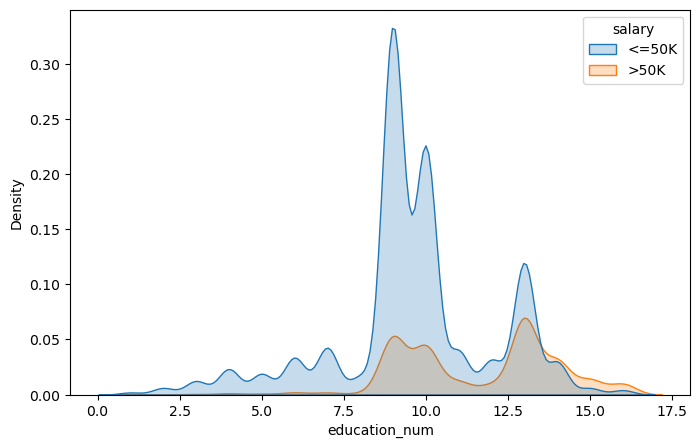

In [51]:
plt.subplots(figsize=(8,5))
sns.kdeplot(x='education_num',data=df,hue='salary',fill=True)

<Axes: xlabel='salary', ylabel='education_num'>

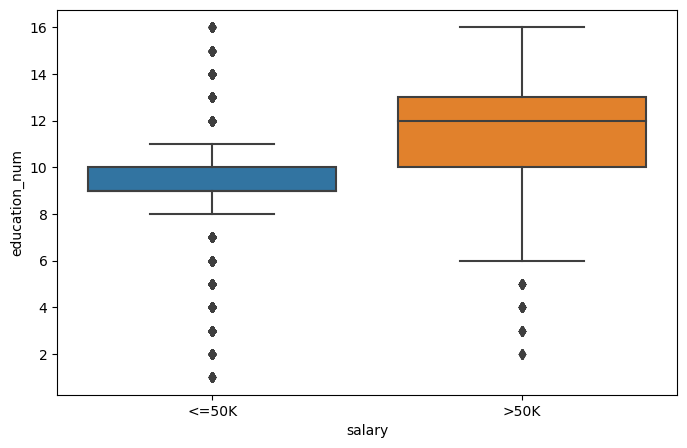

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',data=df,y='education_num')

In [53]:
df.groupby('education_num')['salary'].value_counts()

education_num  salary
1.0            <=50K       49
2.0            <=50K      153
               >50K         6
3.0            <=50K      313
               >50K        16
4.0            <=50K      592
               >50K        38
5.0            <=50K      477
               >50K        26
6.0            <=50K      854
               >50K        62
7.0            <=50K     1088
               >50K        58
8.0            <=50K      391
               >50K        33
9.0            <=50K     8579
               >50K      1629
10.0           <=50K     5746
               >50K      1343
11.0           <=50K      994
               >50K       349
12.0           <=50K      787
               >50K       257
13.0           <=50K     3078
               >50K      2167
14.0           >50K       935
               <=50K      751
15.0           >50K       410
               <=50K      149
16.0           >50K       302
               <=50K      103
Name: salary, dtype: int64

## Categorical Featuers

## Education

In [54]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [55]:
df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

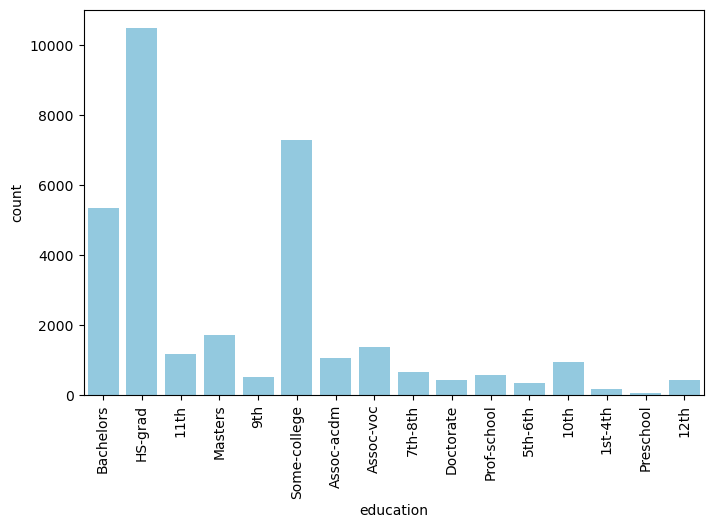

In [56]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='education',data=df,color='skyblue')
ax.set_xticklabels(df.education.unique(),rotation=90);

### Check the count of person in each "salary" levels by the feature education and visualize them with countplot

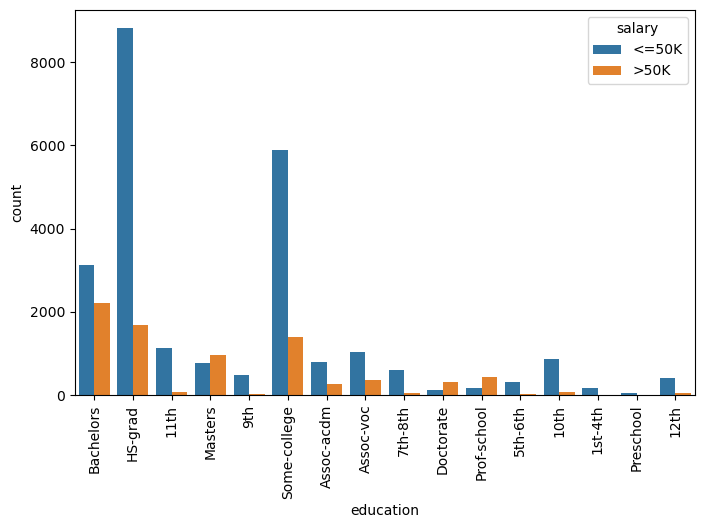

In [57]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='education',data=df,hue='salary')
ax.set_xticklabels(df.education.unique(),rotation=90);

In [58]:
df.groupby('education')['salary'].value_counts(dropna=False)

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

## To plot a piechart

### Decrease the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.

In [59]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
             return "low_level_grade"
    if x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
             return "medium_level_grades"
    if x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
             return "high_level_grade"

In [60]:
df.education.apply(mapping_education).value_counts()

medium_level_grades    20225
high_level_grade        8064
low_level_grade         4248
Name: education, dtype: int64

In [61]:
df['education_summary']=df.education.apply(mapping_education)
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,education_summary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,high_level_grade
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,high_level_grade


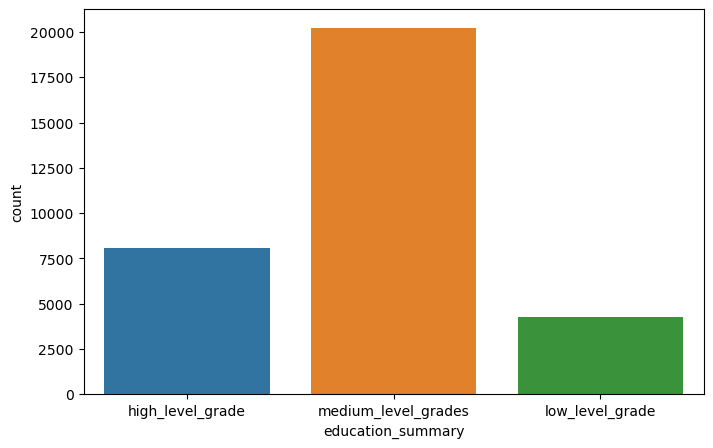

In [62]:
plt.subplots(figsize=(8,5))
edu_lev = sns.countplot(x='education_summary',data=df)

<Axes: xlabel='education_summary', ylabel='count'>

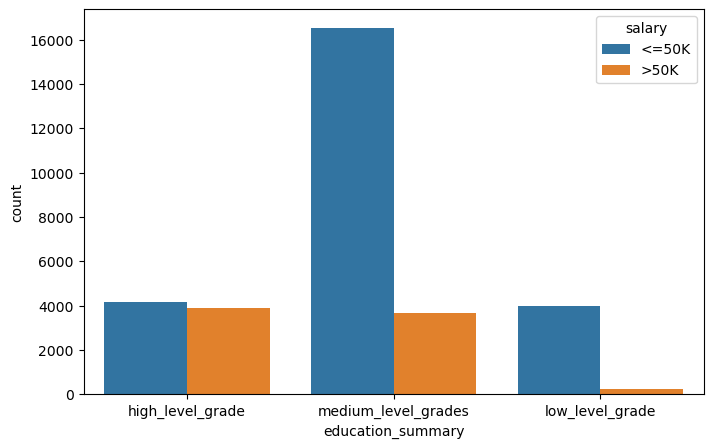

In [63]:
plt.subplots(figsize=(8,5))
sns.countplot(x='education_summary',data=df,hue='salary')

In [64]:
df.salary.value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

In [65]:
df.groupby('education_summary')['salary'].value_counts()

education_summary    salary
high_level_grade     <=50K      4155
                     >50K       3909
low_level_grade      <=50K      4004
                     >50K        244
medium_level_grades  <=50K     16539
                     >50K       3686
Name: salary, dtype: int64

In [66]:
(df.groupby('education_summary')['salary']).count()

education_summary
high_level_grade        8064
low_level_grade         4248
medium_level_grades    20225
Name: salary, dtype: int64

In [67]:
percentile = (df.groupby('education_summary')['salary']).value_counts()/ (df.groupby('education_summary')['salary']).count()
percentile

education_summary    salary
high_level_grade     <=50K     0.515253
                     >50K      0.484747
low_level_grade      <=50K     0.942561
                     >50K      0.057439
medium_level_grades  <=50K     0.817750
                     >50K      0.182250
Name: salary, dtype: float64

In [68]:
high= percentile[:2]
high


education_summary  salary
high_level_grade   <=50K     0.515253
                   >50K      0.484747
Name: salary, dtype: float64

In [69]:
low=percentile[2:4]
low

education_summary  salary
low_level_grade    <=50K     0.942561
                   >50K      0.057439
Name: salary, dtype: float64

In [70]:
medium=percentile[4:]
medium

education_summary    salary
medium_level_grades  <=50K     0.81775
                     >50K      0.18225
Name: salary, dtype: float64

Text(0, 0.5, 'salary')

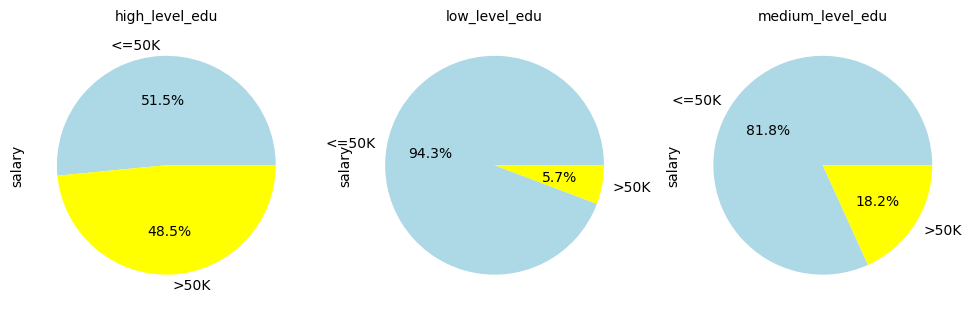

In [71]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))
ax1.pie(high, labels=['<=50K','>50K'],autopct='%0.1f%%',colors=['lightblue','yellow'])
ax1.set_title('high_level_edu',fontsize=10)
ax1.set_ylabel('salary')
ax2.pie(low, labels=['<=50K','>50K'],autopct='%0.1f%%',colors=['lightblue','yellow'])
ax2.set_title('low_level_edu',fontsize=10)
ax2.set_ylabel('salary')
ax3.pie(medium, labels=['<=50K','>50K'],autopct='%0.1f%%',colors=['lightblue','yellow'])
ax3.set_title('medium_level_edu',fontsize=10)
ax3.set_ylabel('salary')

## Martial Status

In [72]:
df.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [73]:
df.marital_status.value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

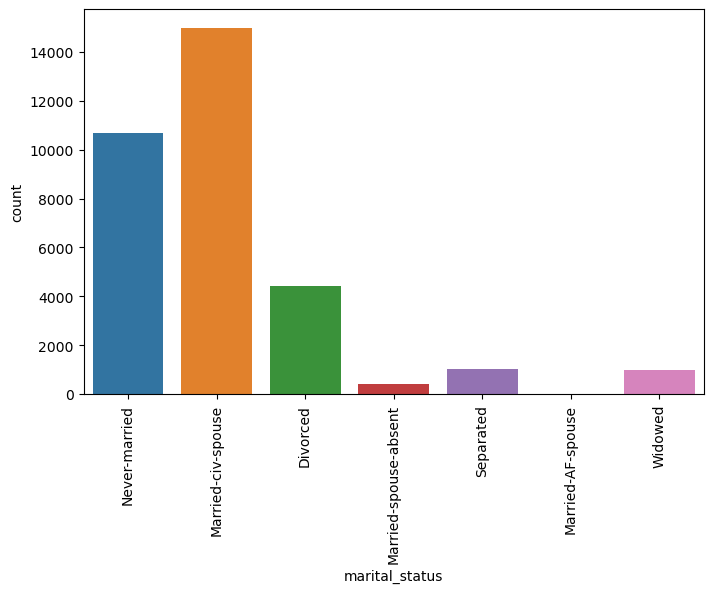

In [74]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='marital_status',data=df)
ax.set_xticklabels(df.marital_status.unique(),rotation=90);

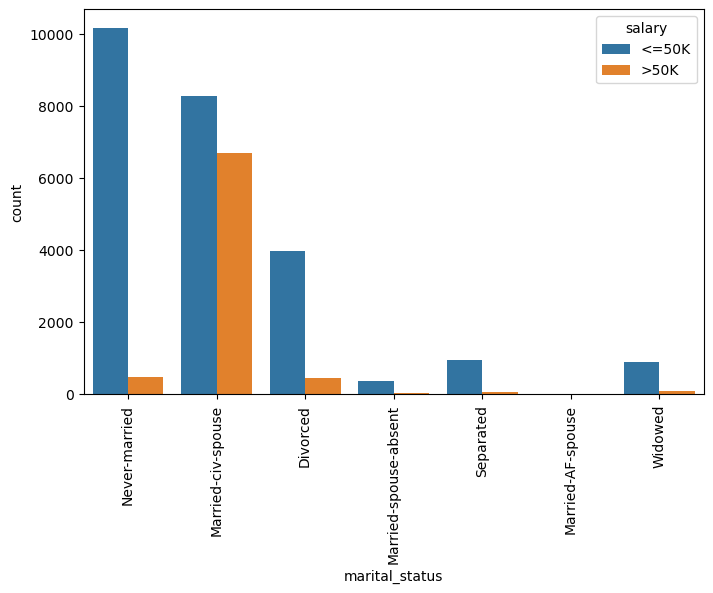

In [75]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='marital_status',data=df,hue='salary')
ax.set_xticklabels(df.marital_status.unique(),rotation=90);

In [76]:
def marital_arranging(x):
    if x in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        return 'Married'
    if x in ['Divorced','Separated','Widowed']:
        return 'Divorced'
    if x in ['Never-married']:
        return 'Never Married'

In [77]:
df['Marital_Status']=df.marital_status.apply(marital_arranging)

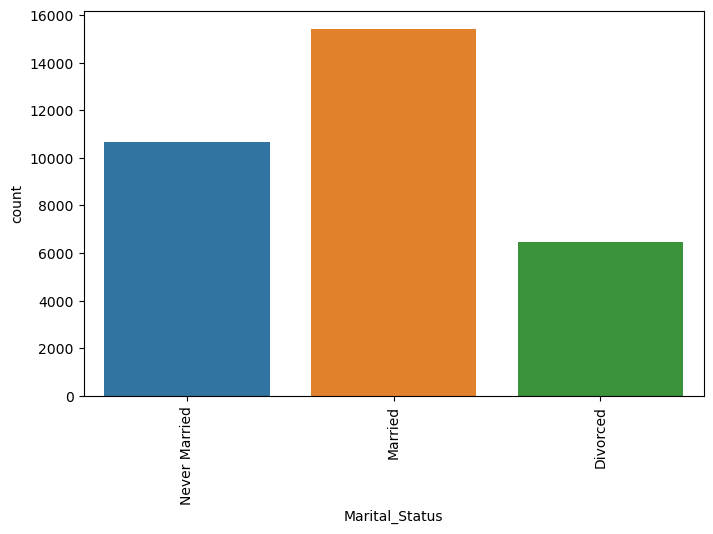

In [78]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Marital_Status',data=df)
ax.set_xticklabels(df.Marital_Status.unique(),rotation=90);

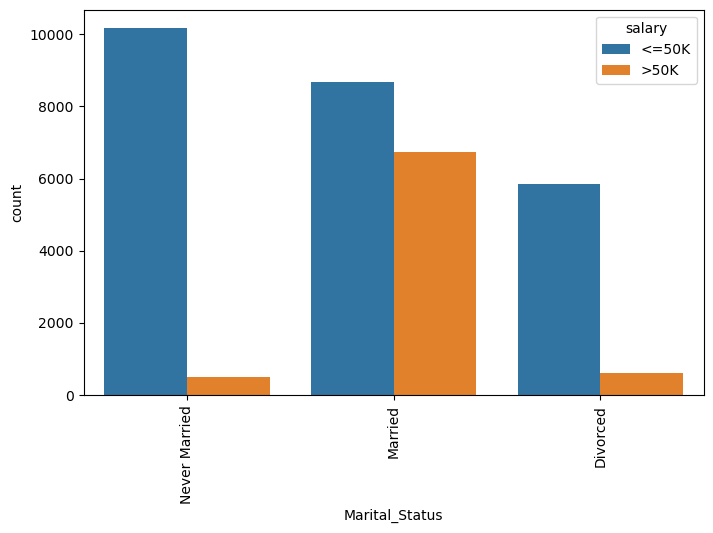

In [79]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Marital_Status',data=df,hue='salary')
ax.set_xticklabels(df.Marital_Status.unique(),rotation=90);

In [80]:
df.Marital_Status.value_counts()

Married          15411
Never Married    10667
Divorced          6459
Name: Marital_Status, dtype: int64

In [81]:
df.groupby('Marital_Status')['salary'].value_counts()

Marital_Status  salary
Divorced        <=50K      5845
                >50K        614
Married         <=50K      8677
                >50K       6734
Never Married   <=50K     10176
                >50K        491
Name: salary, dtype: int64

In [82]:
marital_per=df.groupby('Marital_Status')['salary'].value_counts()/df.groupby('Marital_Status')['salary'].count()
marital_per

Marital_Status  salary
Divorced        <=50K     0.904939
                >50K      0.095061
Married         <=50K     0.563039
                >50K      0.436961
Never Married   <=50K     0.953970
                >50K      0.046030
Name: salary, dtype: float64

In [83]:
Divorced = marital_per[:2]
Divorced

Marital_Status  salary
Divorced        <=50K     0.904939
                >50K      0.095061
Name: salary, dtype: float64

In [84]:
Married = marital_per[2:4]
Married

Marital_Status  salary
Married         <=50K     0.563039
                >50K      0.436961
Name: salary, dtype: float64

In [85]:
Never_Married = marital_per[4:]
Never_Married

Marital_Status  salary
Never Married   <=50K     0.95397
                >50K      0.04603
Name: salary, dtype: float64

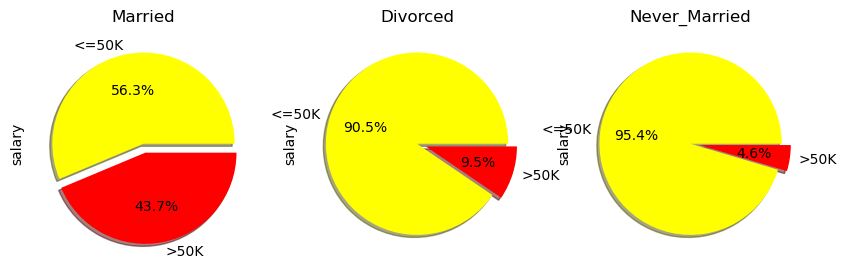

In [86]:
fig,(plot1,plot2,plot3)=plt.subplots(ncols=3,figsize=(10,6));
plot1.pie(Married,autopct='%.1f%%',labels=['<=50K','>50K'],explode=[0,0.1],shadow=True,colors=(['yellow','red']))
plot1.set_title('Married')
plot1.set_ylabel('salary')
plot2.pie(Divorced,autopct='%.1f%%',labels=['<=50K','>50K'],explode=[0,0.1],shadow=True,colors=(['yellow','red']))
plot2.set_title('Divorced')
plot2.set_ylabel('salary')
plot3.pie(Never_Married,autopct='%.1f%%',labels=['<=50K','>50K'],explode=[0,0.1],shadow=True,colors=(['yellow','red']))
plot3.set_title('Never_Married')
plot3.set_ylabel('salary');

## Sex

In [87]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [88]:
df.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

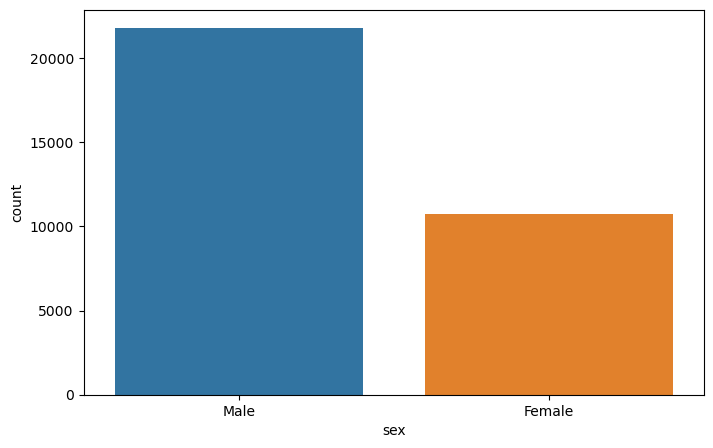

In [89]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='sex',data=df)

<Axes: xlabel='sex', ylabel='count'>

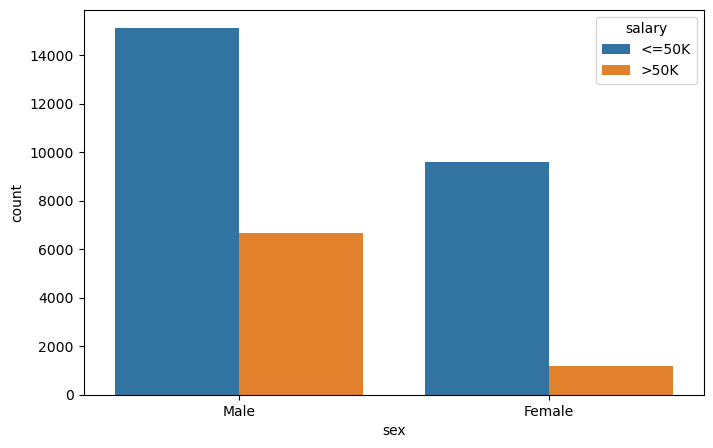

In [90]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='sex',data=df,hue='salary')

In [91]:
df.groupby('sex')['salary'].value_counts()

sex     salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

In [92]:
sex_per = df.groupby('sex')['salary'].value_counts()/df.groupby('sex')['salary'].count()
sex_per

sex     salary
Female  <=50K     0.890448
        >50K      0.109552
Male    <=50K     0.694145
        >50K      0.305855
Name: salary, dtype: float64

In [93]:
Female = sex_per[:2]
print(Female)
Male = sex_per[2:]
print(Male)

sex     salary
Female  <=50K     0.890448
        >50K      0.109552
Name: salary, dtype: float64
sex   salary
Male  <=50K     0.694145
      >50K      0.305855
Name: salary, dtype: float64


Text(0, 0.5, 'salary')

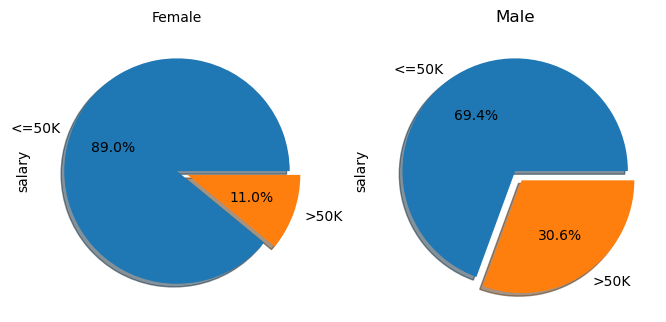

In [94]:
fig , (plot1,plot2) = plt.subplots(ncols=2,figsize=(8,6))
plot1.pie(Female,labels=['<=50K','>50K'],autopct='%.1f%%',shadow=True,explode=[0,0.1])
plot1.set_title('Female',fontsize=10)
plot1.set_ylabel('salary')
plot2.pie(Male,labels=['<=50K','>50K'],autopct='%.1f%%',shadow=True,explode=[0,0.1])
plot2.set_title('Male')
plot2.set_ylabel('salary')

#### Result : The percentage of male is more who earns >50K than female

In [95]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,education_summary,Marital_Status
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,high_level_grade,Never Married
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,high_level_grade,Married


## Data Cleaning

### 1. Handling Missing values

In [96]:
df.isnull().sum()

age                     0
workclass               0
fnlwgt                  0
education               0
education_num         802
marital_status          0
occupation              0
relationship         5064
race                    0
sex                     0
capital_gain            0
capital_loss            0
hours_per_week          0
native_country          0
salary                  0
education_summary       0
Marital_Status          0
dtype: int64

In [97]:
df.dropna(axis=1,inplace=True)

In [98]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital_status       0
occupation           0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
education_summary    0
Marital_Status       0
dtype: int64

In [99]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [100]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [101]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [102]:
df.isnull().sum()

age                     0
workclass            1836
fnlwgt                  0
education               0
marital_status          0
occupation           1843
race                    0
sex                     0
capital_gain            0
capital_loss            0
hours_per_week          0
native_country        582
salary                  0
education_summary       0
Marital_Status          0
dtype: int64

In [103]:
df.dropna(inplace=True)
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital_status       0
occupation           0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
education_summary    0
Marital_Status       0
dtype: int64

## Handling Outliers

<Axes: >

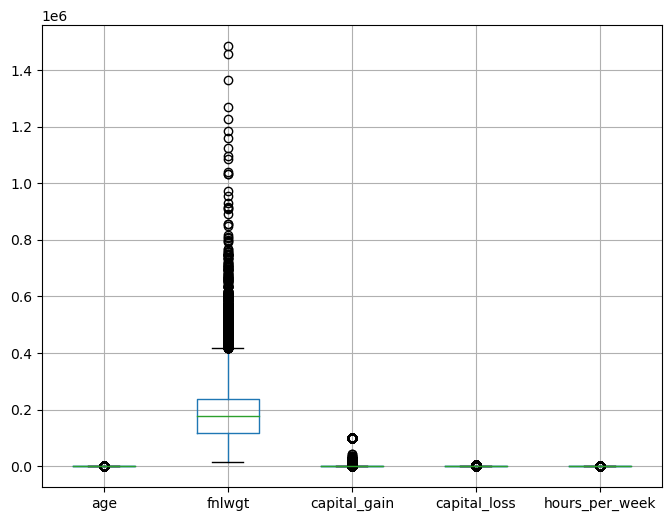

In [104]:
plt.figure(figsize=(8,6))
df.boxplot()

<Axes: xlabel='hours_per_week'>

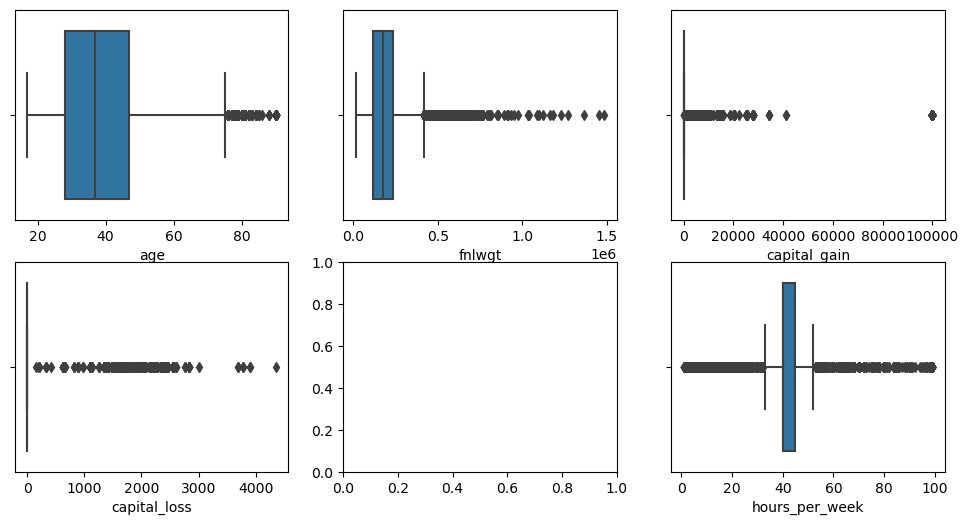

In [105]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,6))

sns.boxplot(ax=ax[0, 0], data=df, x='age')
sns.boxplot(ax=ax[0, 1], data=df, x='fnlwgt')
sns.boxplot(ax=ax[0, 2], data=df, x='capital_gain')
sns.boxplot(ax=ax[1, 0], data=df, x='capital_loss')
sns.boxplot(ax=ax[1, 2], data=df, x='hours_per_week')


In [106]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076279,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,0.000420,-0.009755,-0.023033
capital_gain,0.080162,0.000420,1.000000,-0.032255,0.080429
capital_loss,0.060141,-0.009755,-0.032255,1.000000,0.052380
hours_per_week,0.101348,-0.023033,0.080429,0.052380,1.000000


/tmp/ipykernel_32/3983878547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

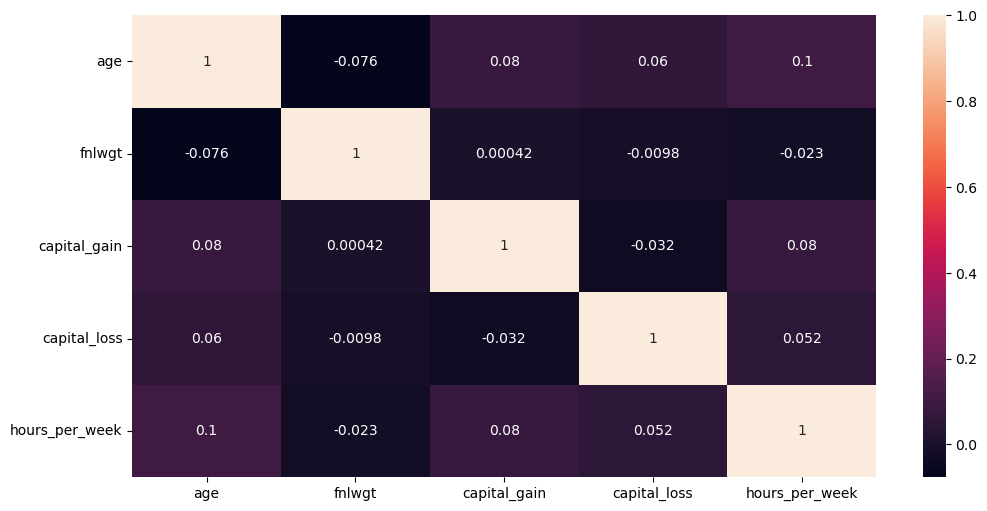

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)